# Quality control

Brains f23, m12, m13, m21, m22 and m23 have poor image quality at the bottom/rear of the brain. The running hypothesis is that the glue is the culprit since the part of the brain affected is where the glue was attached. But we want to rule out any processing artifacts before we re-image. In this notebook I will look at the brains affected at the raw pre-stitched, stitched and corrected stages to see if we introduced these issues during any of these steps.

In [13]:
import os,glob
import tifffile
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
sample_name = "zimmerman_02-m23"

In [22]:
# First find where in the corrected brains the problem is

In [23]:
ch642_corrected_path = os.path.join('/jukebox/LightSheetData/lightserv/cz15/zimmerman_02',
                         sample_name,'imaging_request_1','rawdata','resolution_3.6x',
                         'Ex_642_Em_2_corrected')

In [24]:
for dirpath, dirnames, filenames in os.walk(ch642_corrected_path):
    if not dirnames:
        corrected_slice_dir = dirpath
        break
corrected_slice_dir

'/jukebox/LightSheetData/lightserv/cz15/zimmerman_02/zimmerman_02-m23/imaging_request_1/rawdata/resolution_3.6x/Ex_642_Em_2_corrected/RES(7581x5740x3235)/113920/113920_099310'

In [25]:
corrected_slices = sorted(glob.glob(corrected_slice_dir + '/*tif'))
len(corrected_slices)

3235

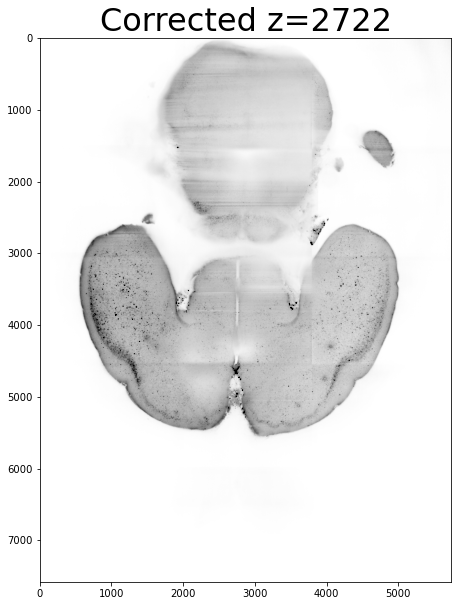

In [27]:
z_plane = 2722
corrected_plane = tifffile.imread(corrected_slices[z_plane])
fig = plt.figure(figsize=(8,10))
ax=fig.add_subplot(111)
ax.set_title(f"Corrected z={z_plane}",fontsize=32)
ax.imshow(corrected_plane,cmap='gray_r',vmin=0,vmax=1500)

Can clearly see the problem in the top part of the image. Next let's see if the stitched files have this issue too. 

In [28]:
ch642_stitched_path = os.path.join('/jukebox/LightSheetData/lightserv/cz15/zimmerman_02',
                         sample_name,'imaging_request_1','rawdata','resolution_3.6x',
                         'Ex_642_Em_2_stitched')

In [33]:
for dirpath, dirnames, filenames in os.walk(ch642_stitched_path):
    if not dirnames:
        stitched_slice_dir = dirpath
        break
stitched_slice_dir

'/jukebox/LightSheetData/lightserv/cz15/zimmerman_02/zimmerman_02-m23/imaging_request_1/rawdata/resolution_3.6x/Ex_642_Em_2_stitched/RES(7581x5740x3235)/113920/113920_099310'

In [34]:
stitched_slices = sorted(glob.glob(stitched_slice_dir + '/*tif'))
len(stitched_slices)

3235

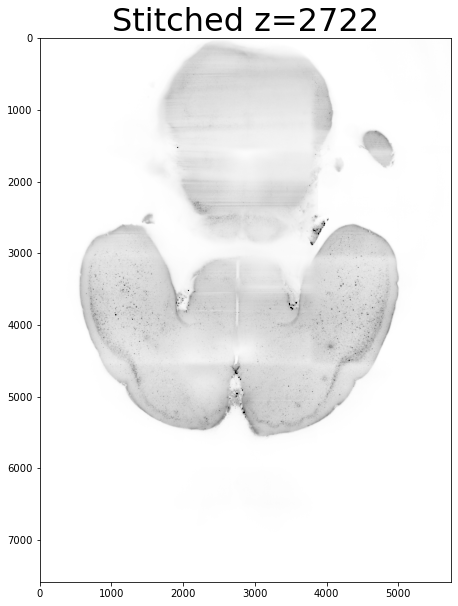

In [35]:
z_plane = 2722
stitched_plane = tifffile.imread(stitched_slices[z_plane])
fig = plt.figure(figsize=(8,10))
ax=fig.add_subplot(111)
ax.set_title(f"Stitched z={z_plane}",fontsize=32)
ax.imshow(stitched_plane,cmap='gray_r',vmin=0,vmax=1500)

Still has the issue. Let's check the raw tiles. I would be very surprised if the stitching introduced this problem but good to check anyway.

In [37]:
ch642_raw_path = os.path.join('/jukebox/LightSheetData/lightserv/cz15/zimmerman_02',
                         sample_name,'imaging_request_1','rawdata','resolution_3.6x',
                         'Ex_642_Em_2')

In [38]:
raw_slice_dirs = []
for dirpath, dirnames, filenames in os.walk(ch642_raw_path):
    if not dirnames:
        raw_slice_dirs.append(dirpath)

In [40]:
len(raw_slice_dirs)

15

In [48]:
# We have 3 rows by 5 cols here, so let's plot this in a subplot matrix
raw_plane_dict = {}
for raw_slice_dir in raw_slice_dirs:
    row = raw_slice_dir.split('/')[-2]
    col = raw_slice_dir.split('/')[-1]
    z_planes = sorted(glob.glob(raw_slice_dir + '/*tiff'))
    try:
        raw_plane_dict[row][col] = z_planes
    except KeyError:
        raw_plane_dict[row] = {col:z_planes}


In [62]:
raw_plane_dict.keys()

dict_keys(['166940', '133350', '099760'])

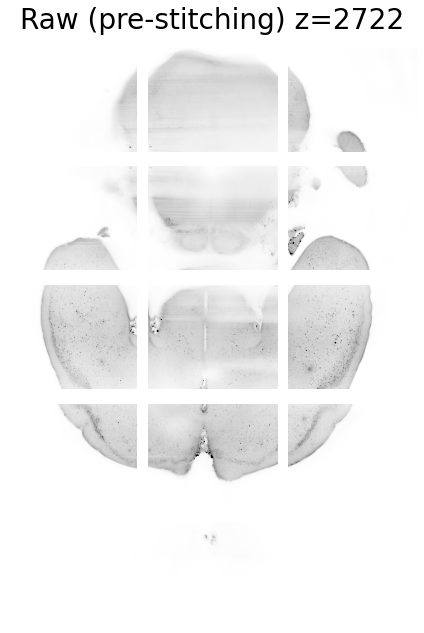

In [78]:
z_plane = 2722
fig,axes = plt.subplots(nrows=5,ncols=3,figsize=(6,9))
for ii,row in enumerate(sorted(list(raw_plane_dict.keys()))):
    for jj,col in enumerate(sorted(list(raw_plane_dict[row].keys()))):
        ax = axes[jj][ii]
        z_planes = raw_plane_dict[row][col]
        raw_plane = tifffile.imread(z_planes[z_plane])

# ax.set_title(f"Raw z={z_plane}",fontsize=32)
        ax.imshow(raw_plane,cmap='gray_r',vmin=0,vmax=1500)
        ax.axis('off')
fig.suptitle(f"Raw (pre-stitching) z={z_plane}",fontsize=28)

plt.tight_layout()

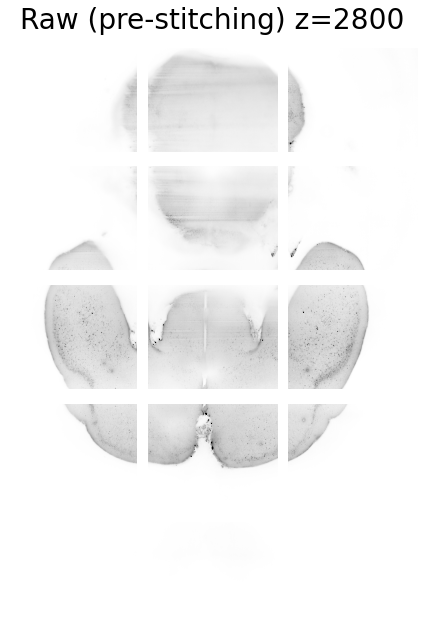

In [77]:
z_plane = 2800
fig,axes = plt.subplots(nrows=5,ncols=3,figsize=(6,9))
for ii,row in enumerate(sorted(list(raw_plane_dict.keys()))):
    for jj,col in enumerate(sorted(list(raw_plane_dict[row].keys()))):
        ax = axes[jj][ii]
        z_planes = raw_plane_dict[row][col]
        raw_plane = tifffile.imread(z_planes[z_plane])

# ax.set_title(f"Raw z={z_plane}",fontsize=32)
        ax.imshow(raw_plane,cmap='gray_r',vmin=0,vmax=1500)
        ax.axis('off')
fig.suptitle(f"Raw (pre-stitching) z={z_plane}",fontsize=28)
plt.tight_layout()